#**Importing libraries**

In [2]:
## Installing the new version of pandas profiling V2.9
#import sys
#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 266kB 6.4MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 3.1MB 8.6MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 604kB 35.6MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 112kB 43.1MB/s 
     |████████████████████████████████| 296kB 35.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=ef8c0dbf20cec7b0d2942124178fc4a1137586cacb268f8fe3f1d199fdeea484
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=6807305f1436792ac63f95368a5ea2b4ab3853ebba287447a85cb9dd3d29c716
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imag

In [2]:


import pandas as pd ## manipulation of dataframes
import numpy as np

## Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Imports from Scikit learn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder ## helps in encoding categorical variables
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder

import warnings ## Suppress warnings
warnings.filterwarnings('ignore')
import os ## for file system management
import gc ## For memory management

import pandas_profiling
from pandas_profiling import ProfileReport


In [16]:
## installing the new version of pandas in colab
#!pip install pandas==1.1.3

     |████████████████████████████████| 9.5MB 6.3MB/s 
  Found existing installation: pandas 1.1.2
    Uninstalling pandas-1.1.2:
      Successfully uninstalled pandas-1.1.2


In [4]:
# pandas version
#pd.__version__

'1.1.3'

In [5]:
#pandas_profiling.__version__

'2.9.0'

#**Loading dataset**
- The dataset was obtained from kaggle dataset.
- It is collected from a lending club from years 2007- 2014 and the second one from 2016 to 2017. 
- The first one consists of 887,379 examples and 74 features. 
- The second dataset consists of 759,338 examples and 72 features.
- We will merge the two datasets to form one dataset. 
- The main purpose is to predict the probability of default of a loan by a given loan applicant.

In [3]:
# Code to read csv file into Colaboratory from the google drive:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Loading the first dataset from years 2007-2014.

In [4]:
link = 'https://drive.google.com/open?id=1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx'

In [5]:
fluff, id = link.split('=')

print (id) 

1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx


In [6]:

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1= pd.read_csv('Filename.csv')
print(data1.shape)
data1.head()

(466285, 74)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  1077501    1296599       5000  ...     NaN          NaN          NaN
1  1077430    1314167       2500  ...     NaN          NaN          NaN
2  1077175    1313524       2400  ...     NaN          NaN          NaN
3  1076863    1277178      10000  ...     NaN          NaN          NaN
4  1075358    1311748       3000  ...     NaN          NaN          NaN

[5 rows x 74 columns]

### Loading the second dataset from 2016-2017

In [7]:
link = 'https://drive.google.com/open?id=1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G'

In [8]:
fluff, id = link.split('=')

print (id) 

1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G


In [9]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data2 = pd.read_csv('Filename.csv')
print(data2.shape)
data2.head()

(759338, 72)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  112435993        NaN       2300  ...     1.0          0.0          2.0
1  112290210        NaN      16000  ...     0.0          6.0          1.0
2  112436985        NaN       6025  ...     1.0          5.0          3.0
3  112439006        NaN      20400  ...     1.0          1.0          1.0
4  112438929        NaN      13000  ...     0.0          0.0          0.0

[5 rows x 72 columns]

### Merging the two datasets.

In [10]:

### Merge data1 and data2
data3=pd.concat([data1,data2])
## The shape of the new data
print(data3.shape)
## Viewing the first five observations
data3.head() 

(1225623, 74)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  1077501  1296599.0       5000  ...     NaN          NaN          NaN
1  1077430  1314167.0       2500  ...     NaN          NaN          NaN
2  1077175  1313524.0       2400  ...     NaN          NaN          NaN
3  1076863  1277178.0      10000  ...     NaN          NaN          NaN
4  1075358  1311748.0       3000  ...     NaN          NaN          NaN

[5 rows x 74 columns]

#**Data Exploration**
- Let's first understand how our data looks like we will start with the target and later the predictor variables.
- We later check the structure of the dataset.


In [10]:

## Checking the columns in the data

print(list(data3.columns))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

##**Target variable (loan status)**

In [11]:
## The number of examples under each category in the target variable (loan status)

data3['loan_status'].value_counts()

Current                                                789749
Fully Paid                                             315457
Charged Off                                             79672
Late (31-120 days)                                      22254
In Grace Period                                          9780
Late (16-30 days)                                        5094
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                   868
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

## The description of the categories under the target variable. 

In [12]:
pd.set_option('display.max_colwidth', -1) ##allows long text to break for readability purpose

## creating a list of the loan status description
description= [
["current","Loan is up to date on current payments.",789749],
["Fully Paid","Loan has been fully paid off.",315457],
["Charged Off","Loan for which there is no longer a reasonable expectation of further payments.",79672],
["Late (31-120 days)","Loan hasn't been paid in 31 to 120 days (late on the current payment).",22254],
["In Grace Period","The loan is past due but still in the grace period of 15 days.",9780],
["Late (16-30 days)","Loan hasn't been paid in 16 to 30 days (late on the current payment).",5094],
["Does not meet the credit policy. Status:Fully Paid","While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",1988],
["Default","Loan is defaulted on and no payment has been made for more than 121 days.",868],
["Does not meet the credit policy. Status:Charged Off","While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",761]]

## creating a dataframe
loan_status_description = pd.DataFrame(description, columns = ['Type of loan', 'description','count'])

## helps to allign the text in the dataframe on the left
df=loan_status_description.style.set_properties(**{'text-align': 'left'})

## alligning the headers/column names to the left also
df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])



###**Key points to note about the target variable (loan status)**

- Since we are interested in predicting the probability of default we will consider all the loans that are not ongoing and so the company can decide whether to give the loan or not depending on the status of the loan applicant incase they are given the loan.
- We will not treat the late loans as charged off because there is no guarantee that the loanee will not pay the loan.
- Another point is that though the default and charged off seems to be one and the same thing, the defaulted loan can be paid according to the loaner as long as it is not past 150 days and gets to be charged off after 150 days of late payment and there is no chance of the loanee paying it back.
- The model will be of importance to the bank if it can predict whether the loan will be paid or not before the loan is issued otherwise if the loan is already issued then the company will not be protected from losing money and thus we will forcus only on fully paid loans and those that are charged off.

In [16]:
## Remaining with the fully paid loan and the charged off loan
Data = data3.loc[data3['loan_status'].isin(['Fully Paid', 'Charged Off'])]
Data.shape

(395129, 74)

##**Checking the structure of the dataset**
- We will use pandas profiling function which gives detailed description of the data as an interactive report and works better compared to the normal describe() function.

In [25]:
## since the data is large we will use the command minimal to reduce on the time of execution
## This gives the description of the data
profile = ProfileReport(Data, minimal=True)

In [26]:
## Viewing the summary
profile

##**Summary of the features in the data**
- We have 48 numerical variables, 4 boolean and 20 categorical features.
- The dataset has no duplicates but some features have very high percentage of missing values.
- From our summary we see that remaining outstanding principal amount(out_prncp and out_prncp_inv) and the policy code have a constant value and so they will not be very important in our analysis.
- Some of the features like the employment title has very high cardinality and so we will drop all the features with very high cardinality because it might cause overfitting and redaduncy in our analysis.

#**Preprocessing**
- Check all the columns that have missing and remove all those with 50% missing values.
- Remove all the redundant columns that are not available during loan application.
- Perform label encoding to all the columns that are categorical.
- Deal with the missings by replacing them with the mean of the column.
- Perform one hot encoding on the coded columns.
- Perform standardization.

In [ ]:
# helps in providing libraries helpful for visualization of missing values

import missingno as msno 
%matplotlib inline

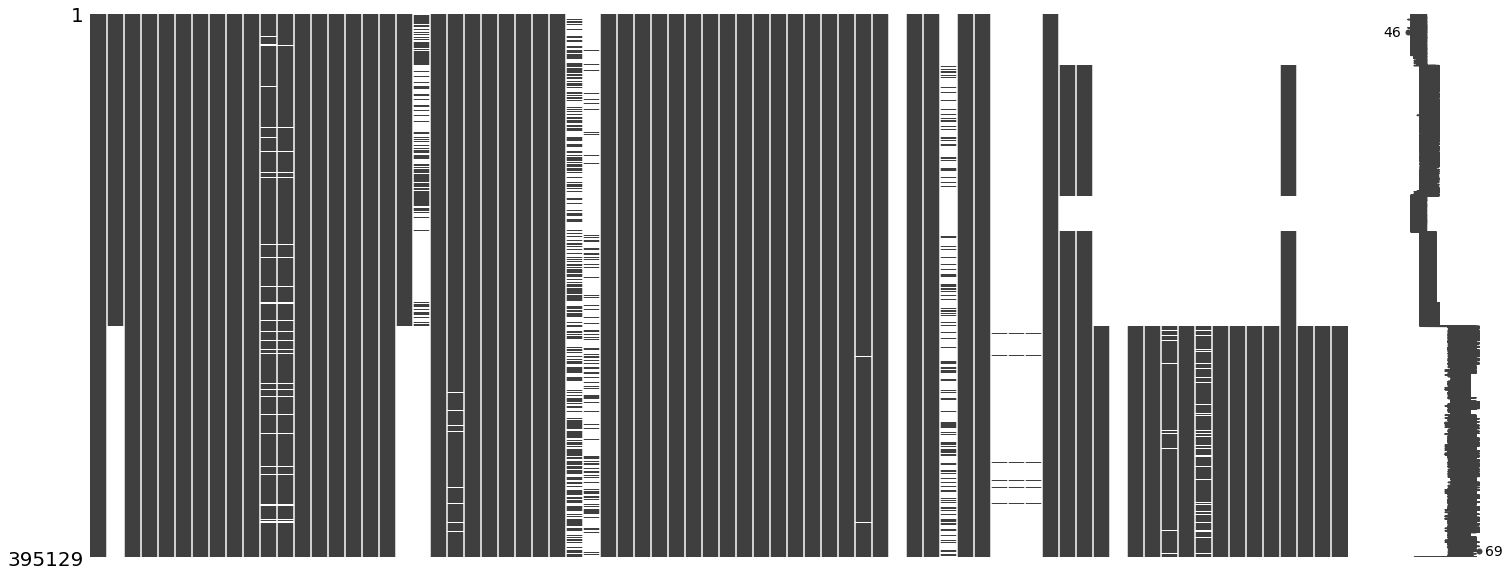

In [18]:
## Visualizing the missing in the dataset
msno.matrix(Data)

- The white lines/spaces represent the missing values in the data. We will do this using two steps:


1.   Removing all the columns with 50% missing values.
2.   Remove all the redundant columns.






In [19]:
## Dropping all the columns that have 50% missing values
Data.dropna(thresh = Data.shape[0]*0.5, how = 'all', axis = 'columns', inplace = True)
print(Data.shape)

(395129, 52)


In [20]:
### Checking the 52 columns remaining 
Data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

We are going to remove all those features that are available once one has been given the loan and so they are not important during loan application.

In [21]:
#drop all unnecessary columns/redundant columns

Data.drop(columns = ['id', 'sub_grade', 'emp_title', 'title', 'funded_amnt','url','member_id', 'funded_amnt_inv',

                          'zip_code', 'recoveries', 'collection_recovery_fee','inq_last_6mths',

                          'total_rec_prncp', 'total_rec_late_fee','addr_state','last_pymnt_d','earliest_cr_line',
                     
                     'last_credit_pull_d','total_rev_hi_lim','tot_cur_bal','tot_coll_amt','delinq_2yrs','revol_bal',
                     
                     'revol_util','out_prncp','out_prncp_inv','policy_code','total_pymnt','total_pymnt_inv',
                     
                     'total_rec_int','last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','emp_length',], inplace = True)

print(Data.shape)

(395129, 18)


In [23]:

## Checking whether we still have missing values
Data.isna().sum()

loan_amnt              0 
term                   0 
int_rate               0 
installment            0 
grade                  0 
home_ownership         0 
annual_inc             0 
verification_status    0 
issue_d                0 
loan_status            0 
pymnt_plan             0 
purpose                0 
dti                    34
open_acc               0 
pub_rec                0 
total_acc              0 
initial_list_status    0 
application_type       0 
dtype: int64

In [24]:
## checking the data types of the columns
Data.dtypes.value_counts()

object     10
float64    7 
int64      1 
dtype: int64

#**Exploratory Descriptive Analysis**
- We will explore the remaining columns by performing summary statistics and visualization for better understanding of the data.



###1.   **Loan Amount**




In [25]:
Data['loan_amnt'].describe()

count    395129.000000
mean     13935.696633 
std      8539.225985  
min      500.000000   
25%      7250.000000  
50%      12000.000000 
75%      19675.000000 
max      40000.000000 
Name: loan_amnt, dtype: float64

From above we see that the loan applied for ranges from 500 dollars to 40,000 dollars.

In [26]:
def visualization_plots(feature_name, feature_full_name, continuous):

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,2), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(Data.loc[Data[feature_name].notnull(), feature_name], kde=False, ax=ax1)
    else:
        sns.countplot(Data[feature_name], order=sorted(Data[feature_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(feature_full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(feature_full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=feature_name, y='loan_status', data=Data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(feature_full_name + ' by Loan Status')
    else:
        charge_off_rates = Data.groupby(feature_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + feature_full_name)
    ax2.set_xlabel(feature_full_name)
    
    plt.tight_layout()

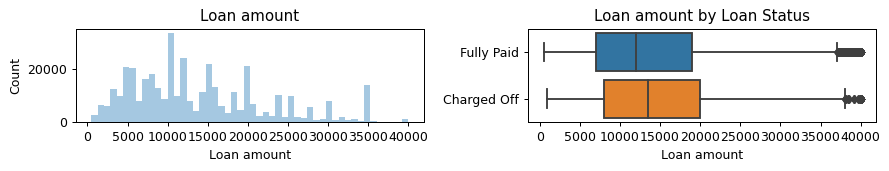

In [27]:
visualization_plots('loan_amnt', 'Loan amount', continuous=True)

In [28]:
Data.groupby('loan_status')['loan_amnt'].describe()

count          mean          std  ...      50%      75%      max
loan_status                                       ...                           
Charged Off  79672.0   15065.706898  8776.004110  ...  13500.0  20000.0  40000.0
Fully Paid   315457.0  13650.300596  8454.537464  ...  12000.0  19000.0  40000.0

[2 rows x 8 columns]

- From the boxplot we see that those who are charged off mostly take higher loans compared to those who pay in full. This is seen better in the summary statistics below the plots.




###2.   **Term**




In [29]:
## To make sure that there is no space between the string in the term category i.e "36 months" and "36 months "
Data['term'] = Data['term'].str.replace(" ","")

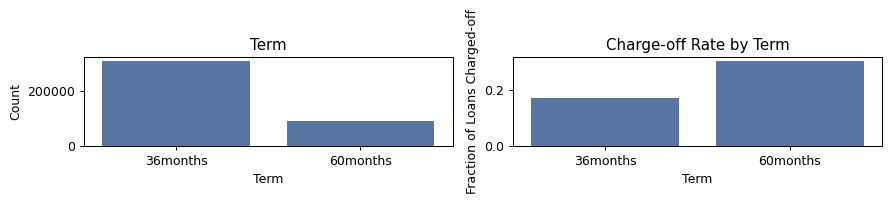

In [30]:
visualization_plots('term', 'Term', continuous=False)

- We see that most of the loan applied for is for a term of 36 months and most of those that are charged off are those that are taken for a term of 60 months.



##3. **Interest rate** 




In [31]:
Data.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%   75%    max
loan_status                                                                
Charged Off  79672.0   16.140580  4.881872  5.32  12.79  15.61  19.2  30.99
Fully Paid   315457.0  13.217193  4.634891  5.32  9.75   12.98  15.8  30.99

- The charged off loans are mostly charged very high interest rate.



##4. **Installments**  




In [32]:
Data.groupby('loan_status')['installment'].describe()

count        mean         std  ...     50%     75%      max
loan_status                                    ...                         
Charged Off  79672.0   462.912515  268.806330  ...  401.39  604.63  1569.11
Fully Paid   315457.0  422.542295  258.874512  ...  361.48  557.38  1714.54

[2 rows x 8 columns]

- The charged off loans are again very high installment compared to those loans that end up been fully paid.

In [33]:
## Identifying all the categorical features in the data
categorical_list=Data.select_dtypes(include="object").columns
print(categorical_list)

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')


- We will first do label encoding on the target variable (loan status) and label it as the target and then drop it from the main data to avoid it from been standardized.

In [34]:
## Performing label encoding on the target variable and renaming the column from loan_status to target_variable
Data['target_variable']= (Data['loan_status'] == 'Charged Off').apply(np.uint8)
Data.drop('loan_status', axis=1, inplace=True)
Data

loan_amnt      term  ...  application_type  target_variable
0       5000       36months  ...  INDIVIDUAL        0              
1       2500       60months  ...  INDIVIDUAL        1              
2       2400       36months  ...  INDIVIDUAL        0              
3       10000      36months  ...  INDIVIDUAL        0              
5       5000       36months  ...  INDIVIDUAL        0              
...      ...            ...  ...         ...       ..              
759324  5000       36months  ...  Individual        1              
759328  6000       36months  ...  Individual        1              
759329  6000       36months  ...  Individual        0              
759330  24100      60months  ...  Individual        1              
759331  4000       36months  ...  Individual        0              

[395129 rows x 18 columns]

In [35]:
## Creating a dataframe of the target variable 
Targ=pd.concat([Data['issue_d'],Data['target_variable']],axis=1)
Targ

issue_d  target_variable
0       Dec-11  0              
1       Dec-11  1              
2       Dec-11  0              
3       Dec-11  0              
5       Dec-11  0              
...        ... ..              
759324  Jan-16  1              
759328  Jan-16  1              
759329  Jan-16  0              
759330  Jan-16  1              
759331  Jan-16  0              

[395129 rows x 2 columns]

In [36]:
##The columns we are using
Data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'dti', 'open_acc', 'pub_rec', 'total_acc',
       'initial_list_status', 'application_type', 'target_variable'],
      dtype='object')

In [37]:
## All the features in the dataset that are numerical
features=['loan_amnt',  'int_rate', 'installment',
        'annual_inc', 
        'dti','open_acc', 'pub_rec', 'total_acc']
    
numerical_features=pd.DataFrame(Data[features])
numerical_features.head()

loan_amnt  int_rate  installment  ...  open_acc  pub_rec  total_acc
0  5000       10.65     162.87       ...  3.0       0.0      9.0      
1  2500       15.27     59.83        ...  3.0       0.0      4.0      
2  2400       15.96     84.33        ...  2.0       0.0      10.0     
3  10000      13.49     339.31       ...  10.0      0.0      37.0     
5  5000       7.90      156.46       ...  9.0       0.0      12.0     

[5 rows x 8 columns]

In [38]:
## Filling all the missing values in the numerical features
numerical_features.fillna(numerical_features.mean(),inplace = True)
print("Current shape of dataset :",numerical_features.shape)

Current shape of dataset : (395129, 8)


In [39]:
numerical_features.isnull().sum().values.any() ## checking whether there is any missing

False

In [40]:
## Standardizing the loan amount column 
numerical_features['loanAmt'] = StandardScaler().fit_transform(np.array(numerical_features['loan_amnt']).reshape(-1, 1)) 
  
# drop the loan amount column as they are not relevant for prediction purpose  
numerical_features = numerical_features.drop(['loan_amnt'], axis = 1)
numerical_features


int_rate  installment  annual_inc  ...  pub_rec  total_acc   loanAmt
0       10.65     162.87       24000.0     ...  0.0      9.0       -1.046431
1       15.27     59.83        30000.0     ...  0.0      4.0       -1.339198
2       15.96     84.33        12252.0     ...  0.0      10.0      -1.350908
3       13.49     339.31       49200.0     ...  0.0      37.0      -0.460897
5       7.90      156.46       36000.0     ...  0.0      12.0      -1.046431
...      ...         ...           ...     ...  ...       ...            ...
759324  15.41     174.34       60000.0     ...  0.0      29.0      -1.046431
759328  26.77     244.22       20000.0     ...  0.0      31.0      -0.929324
759329  13.67     204.11       85000.0     ...  1.0      8.0       -0.929324
759330  18.49     618.43       65000.0     ...  0.0      16.0       1.190309
759331  9.17      127.52       46800.0     ...  0.0      27.0      -1.163537

[395129 rows x 8 columns]

##**Standardization**
- We will standardize the numerical variables.

In [41]:
## Standardizing the amount column 
numerical_features['interest'] = StandardScaler().fit_transform(np.array(numerical_features['int_rate']).reshape(-1, 1)) 
numerical_features['installments'] = StandardScaler().fit_transform(np.array(numerical_features['installment']).reshape(-1, 1))
numerical_features['income'] = StandardScaler().fit_transform(np.array(numerical_features['annual_inc']).reshape(-1, 1))
numerical_features['dti_ratio'] = StandardScaler().fit_transform(np.array(numerical_features['dti']).reshape(-1, 1))
numerical_features['open_accts'] = StandardScaler().fit_transform(np.array(numerical_features['open_acc']).reshape(-1, 1))
numerical_features['Pub_rec'] = StandardScaler().fit_transform(np.array(numerical_features['pub_rec']).reshape(-1, 1))
numerical_features['Total_acc'] = StandardScaler().fit_transform(np.array(numerical_features['total_acc']).reshape(-1, 1))

# drop Time and Amount columns as they are not relevant for prediction purpose  
droped=['int_rate', 'installment',
        'annual_inc', 'total_acc',
        'dti','open_acc', 'pub_rec' ]
numerical_features = numerical_features.drop(droped,axis = 1)
                                             
numerical_features

loanAmt  interest  installments  ...  open_accts   Pub_rec  Total_acc
0      -1.046431 -0.653511 -1.024495      ... -1.581350   -0.354082 -1.351373 
1      -1.339198  0.302952 -1.418666      ... -1.581350   -0.354082 -1.769881 
2      -1.350908  0.445800 -1.324943      ... -1.771689   -0.354082 -1.267672 
3      -0.460897 -0.065555 -0.349538      ... -0.248977   -0.354082  0.992271 
5      -1.046431 -1.222834 -1.049016      ... -0.439316   -0.354082 -1.100269 
...          ...       ...       ...      ...       ...         ...       ... 
759324 -1.046431  0.331936 -0.980617      ...  0.512380   -0.354082  0.322658 
759328 -0.929324  2.683757 -0.713297      ...  1.654414   -0.354082  0.490062 
759329 -0.929324 -0.028290 -0.866735      ... -1.391011    1.521210 -1.435075 
759330  1.190309  0.969577  0.718214      ... -0.819994   -0.354082 -0.765462 
759331 -1.163537 -0.959910 -1.159724      ...  0.131701   -0.354082  0.155255 

[395129 rows x 8 columns]

##**One hot encoding** 
- We are going to first create a new dataframe that consists of the catagorical variables and then perform one hot encoding on the categorical variables by creating dummy variables using pandas.

In [42]:
data=pd.concat([Data['term'], Data['purpose'],Data['grade'],Data['home_ownership'],
              
              Data['verification_status'],Data['pymnt_plan'],Data['initial_list_status']],axis=1)

data



term             purpose  ... pymnt_plan initial_list_status
0       36months  credit_card         ...  n          f                 
1       60months  car                 ...  n          f                 
2       36months  small_business      ...  n          f                 
3       36months  other               ...  n          f                 
5       36months  wedding             ...  n          f                 
...          ...      ...             ... ..         ..                 
759324  36months  debt_consolidation  ...  n          w                 
759328  36months  debt_consolidation  ...  n          w                 
759329  36months  moving              ...  n          f                 
759330  60months  debt_consolidation  ...  n          w                 
759331  36months  credit_card         ...  n          w                 

[395129 rows x 7 columns]

In [43]:
#new = data["term"].replace("36_months ", "36_months").copy()
data['term'] = data['term'].str.replace(" ","")


In [44]:
## One hot encoding using pandas 
Daata=pd.get_dummies(data)
Daata

term_36months  ...  initial_list_status_w
0       1              ...  0                    
1       0              ...  0                    
2       1              ...  0                    
3       1              ...  0                    
5       1              ...  0                    
...    ..              ... ..                    
759324  1              ...  1                    
759328  1              ...  1                    
759329  1              ...  0                    
759330  0              ...  1                    
759331  1              ...  1                    

[395129 rows x 36 columns]

## Merging the newly formed dummy variables and the standardized numerical variables.

In [45]:
loan_data=pd.concat([numerical_features,Daata],axis=1)
loan_data

loanAmt  interest  ...  initial_list_status_f  initial_list_status_w
0      -1.046431 -0.653511  ...  1                      0                    
1      -1.339198  0.302952  ...  1                      0                    
2      -1.350908  0.445800  ...  1                      0                    
3      -0.460897 -0.065555  ...  1                      0                    
5      -1.046431 -1.222834  ...  1                      0                    
...          ...       ...  ... ..                     ..                    
759324 -1.046431  0.331936  ...  0                      1                    
759328 -0.929324  2.683757  ...  0                      1                    
759329 -0.929324 -0.028290  ...  1                      0                    
759330  1.190309  0.969577  ...  0                      1                    
759331 -1.163537 -0.959910  ...  0                      1                    

[395129 rows x 44 columns]

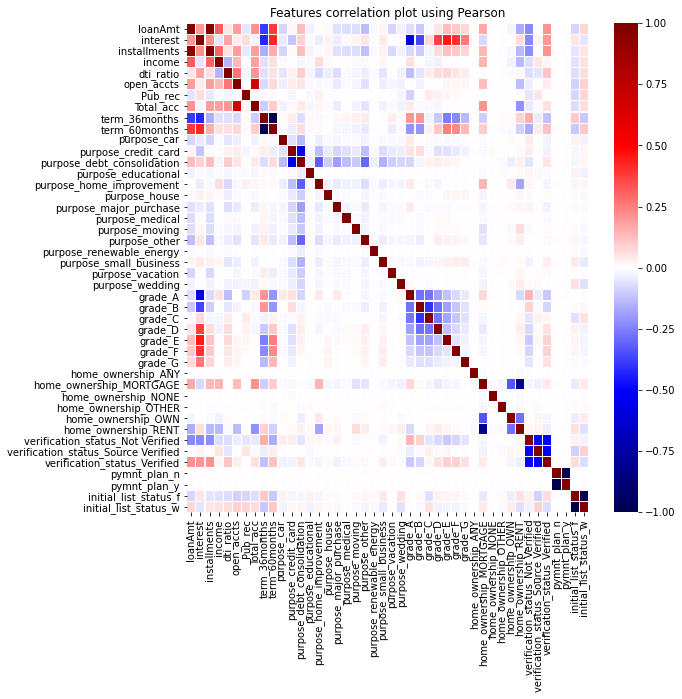

In [46]:
## Correlation matrix to show how the features are correlated as this will affect how the model performs

plt.figure(figsize = (9,9))
plt.title('Features correlation plot using Pearson')
corr = loan_data.corr()## generating the correlation matrix
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="seismic")
plt.show()


### The number of columns increased from 18 to 44 due to the dummy variables created after one hot encoding.

In [47]:
### Merging the target variable and the predictor variables
Loan_data=pd.concat([loan_data,Targ],axis=1)
Loan_data

loanAmt  interest  ...  issue_d  target_variable
0      -1.046431 -0.653511  ...  Dec-11   0              
1      -1.339198  0.302952  ...  Dec-11   1              
2      -1.350908  0.445800  ...  Dec-11   0              
3      -0.460897 -0.065555  ...  Dec-11   0              
5      -1.046431 -1.222834  ...  Dec-11   0              
...          ...       ...  ...     ...  ..              
759324 -1.046431  0.331936  ...  Jan-16   1              
759328 -0.929324  2.683757  ...  Jan-16   1              
759329 -0.929324 -0.028290  ...  Jan-16   0              
759330  1.190309  0.969577  ...  Jan-16   1              
759331 -1.163537 -0.959910  ...  Jan-16   0              

[395129 rows x 46 columns]

##**Spliting the dataset into training and testing set.**
- We will use the issue date to split the dataset such that the testing set contains the latest years when the loan was issued but we will drop this column since it is not available during loan application.
- We will first change the issue date into datetime object.
- Then split the training set to be 80% of the data.


In [48]:
### Converting the date to be in the format mm-yyyy from mm-yy
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('07','2007')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('08','2008')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('09','2009')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('10','2010')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('11','2011')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('12','2012')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('13','2013')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('14','2014')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('16','2016')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('17','2017')

In [49]:
## We will convert the date such that every month will start by the first day of the month
#from datetime import date
Loan_data['issuedate']=pd.to_datetime(Loan_data['issue_d'])
Loan_data.drop('issue_d', axis=1, inplace=True)

In [50]:
## viewing the first 10 examples
Loan_data['issuedate'].sample(10)

127498   2013-06-01
428197   2016-06-01
326219   2014-08-01
201087   2012-09-01
197097   2017-01-01
71193    2017-05-01
559361   2016-12-01
123528   2017-03-01
404359   2014-04-01
169805   2013-02-01
Name: issuedate, dtype: datetime64[ns]

In [51]:
## we now understand better how the column issue date looks like
Loan_data['issuedate'].describe()

count     395129             
unique    112                
top       2016-03-01 00:00:00
freq      22914              
first     2007-06-01 00:00:00
last      2017-09-01 00:00:00
Name: issuedate, dtype: object

- In the data we see that the month of March on 2016 many loan applicants were issued with a loan than any other year.
- The first loan was issued on June 2006 and the recent one was issued on September 2017.

In [52]:
## Spliting the data into training and testing set
train_data = Loan_data.loc[Loan_data['issuedate'] <  Loan_data['issuedate'].quantile(0.8)]
test_data =  Loan_data.loc[Loan_data['issuedate']>= Loan_data['issuedate'].quantile(0.8)]
print('The shape of the training set is:',train_data.shape)
print('The shape of the testing set is:',test_data.shape)

The shape of the training set is: (311251, 46)
The shape of the testing set is: (83878, 46)


In [53]:
## Describing the column issuedate under the training data set
train_data['issuedate'].describe()

count     311251             
unique    97                 
top       2016-03-01 00:00:00
freq      22914              
first     2007-06-01 00:00:00
last      2016-06-01 00:00:00
Name: issuedate, dtype: object

- From above we see that the training set contains data from June 2007 to June 2016.

In [54]:
test_data['issuedate'].describe()

count     83878              
unique    15                 
top       2016-07-01 00:00:00
freq      10825              
first     2016-07-01 00:00:00
last      2017-09-01 00:00:00
Name: issuedate, dtype: object

- We will test the model using data from July 2016 to September 2017. 

In [55]:
## Droping the issuedate column since it is not available during loan application
train_data.drop('issuedate', axis=1, inplace=True)
test_data.drop('issuedate', axis=1, inplace=True)

#**Model creation**
- We will first assign the predictor variables and the predicted one.
- We will create a model without performing any resampling technique and see how well the model predicts new data.
- We will then perform resampling on our training set by creating synthetic instances using SMOTE.
- The model is evaluated using precision, recall and F1 score. 

In [56]:
### Distinguishing between the predictor variables and the predicted variable
y_train=train_data.target_variable
y_test=test_data.target_variable
print('The shape of the train set for the predicted is:',y_train.shape)
print('The shape of the train set for the predicted is:',y_test.shape)

The shape of the train set for the predicted is: (311251,)
The shape of the train set for the predicted is: (83878,)


In [57]:
x_train = train_data.drop('target_variable',axis=1)
x_test = test_data.drop('target_variable',axis=1)
print('The shape of the train set for the predictor is:',x_train.shape)
print('The shape of the train set for the predictor is:',x_test.shape)

The shape of the train set for the predictor is: (311251, 44)
The shape of the train set for the predictor is: (83878, 44)


##**Random Forest**

In [58]:
## we create a model using random forest classifier
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier().fit(x_train, y_train.ravel())

Rf_pred = Rf.predict(x_test)


KeyboardInterrupt: ignored

In [ ]:
## evaluating the model
from sklearn.metrics import classification_report
print(classification_report(y_test, Rf_pred))


##**Random Forest with resampling technique(SMOTE)**

In [ ]:
## Creating synthetics instances using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
Smt = SMOTE()
x_train_smt, y_train_smt = Smt.fit_resample(x_train, y_train.ravel())

In [ ]:
## fitting a model using random forest after performing resampling the data using SMOTE
smt_Rf = RandomForestClassifier().fit(x_train_smt, y_train_smt.ravel())

smt_Rf_pred = smt_Rf.predict(x_test)

In [ ]:
### Evaluating the model after resampling the data
print(classification_report(y_test, smt_Rf_pred))

In [ ]:
preds = smt_Rf.predict_proba(x_test)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
preds_df

##**Logistic regression**